# **Mengimpor Library yang Dibutuhkan**
Kode ini menyediakan pustaka yang umum digunakan untuk analisis data, visualisasi, dan pemrosesan teks dalam machine learning.
1. Pandas: Digunakan untuk manipulasi data berbentuk tabel (DataFrame), seperti pengolahan data, pembersihan data, dan analisis statistik.
2. Matplotlib.pyplot: Digunakan untuk membuat plot dan visualisasi data dalam bentuk grafik (seperti grafik batang, histogram, dll.).
3. Seaborn: Merupakan pustaka visualisasi berbasis Matplotlib yang menyediakan tampilan grafik yang lebih menarik dan mudah dipahami, terutama untuk analisis statistik.
4. TfidfVectorizer: Digunakan untuk mengonversi teks menjadi representasi numerik (vektor), berdasarkan frekuensi kata dan pentingnya kata dalam konteks seluruh kumpulan dokumen (melalui metode TF-IDF).
5. Cosine_similarity: menghitung kemiripan sudut antara vektor-vektor TF-IDF dari setiap dokumen dalam matriks. Nilai similarity berada dalam rentang 0 hingga 1, di mana 1 menunjukkan dokumen yang identik dan 0 menunjukkan dokumen yang sangat berbeda.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **Mengimpor Dataset**
Kode ini merupakan proses mengimpor dataset yang dibutuhkan dalam proyek ini. Sumber dataset yang digunakan pada proyek ini dari github "M. Irvan Dimetrio" (Tautan: https://github.com/IrvanDimetrio/IMDb-Movies-Analysis-in-Indonesia/blob/main/Data/Raw/imdb%20indonesia%20star.xlsx). File yang diimpor berbentuk excel, sehingga harus memanfaatkan fungsi dari library Pandas read_excel.

In [4]:
df = pd.read_excel('imdb_indonesia_star.xlsx')
df

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
0,Kisah Tanah Jawa: Merapi,2019,18+,Horror,43 min,7.8,37,Faozan Rizal,Deva Mahenra,Joshua Suherman,Laura Basuki,Laura Theux
1,Negeri Dongeng,2017,SU,Documentary,98 min,8.9,8,Anggi Frisca,NaN,NaN,NaN,NaN
2,Workingman's Death,2005,13+,Documentary,122 min,7.9,"1,757",Michael Glawogger,NaN,NaN,NaN,NaN
3,Magic Hour,2015,18+,"Comedy, Drama",96 min,8.7,6,Asep Kusdinar,Dimas Anggara,Michelle Ziudith,Rizky Nazar,Nadya Arina
4,Jakarta Love Story,2015,13+,Romance,50 min,NaN,NaN,Vemmy Sagita,Irish Bella,Rezky Adhitya,Rionaldo Stockhorst,Mischa Chandrawinata
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Nariti: Romansa Danau Toba,2022,13+,Drama,85 min,NaN,NaN,Deden Bagaskara,Zoe Abbas Jackson,Bastian Steel,Paramitha Rusady,August Melasz
2704,Hompimpa,2021,D17+,"Horror, Thriller",87 min,6.5,12,Arie Azis,Zoe Abbas Jackson,Kenny Austin,Sebryan Yosvien,Sonia Alexa
2705,Moammar Emka's Jakarta Undercover,2017,21+,"Drama, Romance",129 min,7.1,121,Fajar Nugros,Zoya Amirin,Oka Antara,Ganindra Bimo,Edo Borne
2706,Dan Pulang,2019,13+,"Short, Drama",13 min,NaN,NaN,Daphne,Zulfa Maharani Putri,Oktavia Lisna,NaN,NaN


# **Tahap Data Understanding**
df.info() adalah metode yang digunakan untuk menampilkan informasi ringkas tentang sebuah DataFrame (df) di Pandas.
Dengan teknik ini akan menghasilkan beberapa hasil sebagai berikut ini.
- Jumlah baris (entries) dan kolom.
- Nama kolom dan tipe data setiap kolom.
- Jumlah nilai non-null untuk setiap kolom (untuk memeriksa adanya data yang hilang).
- Penggunaan memori untuk DataFrame.

Informasi di atas sangat bermanfaat untuk proses pengolahan data berikutnya.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2708 non-null   object 
 1   Year               2708 non-null   int64  
 2   Rated              2708 non-null   object 
 3   Genre              2708 non-null   object 
 4   Runtime (Minutes)  2558 non-null   object 
 5   Rating             1575 non-null   float64
 6   Votes              1575 non-null   object 
 7   Director           2708 non-null   object 
 8   Star 1             2470 non-null   object 
 9   Star 2             2325 non-null   object 
 10  Star 3             2140 non-null   object 
 11  Star 4             1838 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 254.0+ KB


df.describe() adalah fungsi yang digunakan untuk menghasilkan ringkasan statistik deskriptif dari DataFrame df. Fungsi ini memberikan informasi seperti:

- Count: Jumlah nilai non-null di setiap kolom.
- Mean: Rata-rata nilai numerik di setiap kolom.
- Std: Standar deviasi untuk mengukur sebaran nilai.
- Min: Nilai terkecil di setiap kolom.
- 25%, 50%, 75%: Kuartil pertama, median (kuartil kedua), dan kuartil ketiga.
- Max: Nilai terbesar di setiap kolom.

Fungsi ini memberikan gambaran umum distribusi data numerik dalam dataset pada kolom-kolom numerik saja.

In [6]:
df.describe()

,Year,Rating
count,2708.000000,1575.000000
mean,2015.295421,6.433143
std,5.135607,1.551367
min,2000.000000,1.200000
25%,2012.000000,5.600000
50%,2016.000000,6.600000
75%,2019.000000,7.400000
max,2023.000000,9.900000


Kode ini untuk mendapatkan ringkasan statistik yang relevan pada kolom-kolom non-numerik, seperti:

- Count: Jumlah nilai non-null dalam kolom.
- Unique: Jumlah nilai unik dalam kolom.
- Top: Nilai yang paling sering muncul (frekuensi tertinggi).
- Freq: Frekuensi kemunculan nilai yang paling sering (nilai "Top").

In [7]:
df.describe(include=['object'])

,Title,Rated,Genre,Runtime (Minutes),Votes,Director,Star 1,Star 2,Star 3,Star 4
count,2708,2708,2708,2558,1575,2708,2470,2325,2140,1838
unique,2681,20,275,154,391,1184,1550,1535,1490,1342
top,Pulang,13+,Drama,90 min,7,Nayato Fio Nuala,Reza Rahadian,Adipati Dolken,Reza Rahadian,Donny Damara
freq,5,1894,417,162,55,70,24,15,13,9


Kode ini menghitung dan menampilkan jumlah nilai yang hilang di setiap kolom dari DataFrame.
1. df.isnull(): Fungsi ini mengembalikan DataFrame baru yang berisi nilai boolean (True atau False) untuk setiap elemen dalam DataFrame df. Nilai True menunjukkan bahwa elemen tersebut adalah missing (NaN atau None), sementara False menunjukkan elemen tersebut memiliki nilai yang valid.

2. sum(): Fungsi ini digunakan untuk menjumlahkan nilai True dalam setiap kolom. Karena True dianggap sebagai 1 dan False sebagai 0, maka sum() menghitung jumlah nilai yang hilang (missing) di setiap kolom.

3. missing_values_count: Variabel ini menyimpan hasil perhitungan jumlah missing values per kolom dalam DataFrame df. Kemudian menampilkannya dalam bentuk tabel yang mudah dibaca.

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Title,0
Year,0
Rated,0
Genre,0
Runtime (Minutes),150
Rating,1133
Votes,1133
Director,0
Star 1,238
Star 2,383


Kode ini digunakan untuk mencari dan menampilkan baris-baris yang duplikat dalam DataFrame df.

- df.duplicated(keep=False): Mengidentifikasi baris yang memiliki nilai duplikat di seluruh kolom, dengan keep=False menandakan semua duplikat dihitung.
- duplicate_rows = df[df.duplicated(keep=False)]: Menyaring baris-baris duplikat dan menyimpannya dalam variabel duplicate_rows.
- num_duplicate_rows = len(duplicate_rows): Menghitung jumlah baris yang berisi duplikat.
- print(f"Jumlah baris..."): Menampilkan jumlah baris yang duplikat.
- print("\nKolom yang..."): Menampilkan baris-baris yang duplikat dalam DataFrame.

In [9]:
# Mencari nilai duplikat berdasarkan kolom
duplicate_rows = df[df.duplicated(keep=False)]

# Menghitung baris yang duplikat lalu menampilkan jumlahnya
num_duplicate_rows = len(duplicate_rows)

print(f"Jumlah baris yang berisi nilai duplikat ada sebanyak: {num_duplicate_rows}")

# Menampilkan seluruh baris dataset yang berisi nilai duplikat
print("\nKolom yang duplikat dan duplikasinya:")
duplicate_rows

Jumlah baris yang berisi nilai duplikat ada sebanyak: 4

Kolom yang duplikat dan duplikasinya:


,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
413,Ingin Menunda: Would Like to Delay,2020,13+,Short,4 min,NaN,NaN,Alfa Kakauhe,Alfa Kakauhe,NaN,NaN,NaN
414,Ingin Menunda: Would Like to Delay,2020,13+,Short,4 min,NaN,NaN,Alfa Kakauhe,Alfa Kakauhe,NaN,NaN,NaN
1744,The Mother's Land,2020,13+,"Short, Fantasy",25 min,NaN,NaN,Kevin Rahardjo,Mikael Farady,Sifra Magdalena,NaN,NaN
1745,The Mother's Land,2020,13+,"Short, Fantasy",25 min,NaN,NaN,Kevin Rahardjo,Mikael Farady,Sifra Magdalena,NaN,NaN


Kode ini digunakan untuk mencari data yang memiliki judul film yang muncul dengan frekuensi lebih dari sekali dalam kolom 'Title'. Variabel `title_to_search` diisi dengan judul film yang dimaksudkan, dan kemudian `df[df['Title'] == title_to_search]` digunakan untuk memfilter baris-baris yang memiliki nilai yang sama pada kolom 'Title'. Hasilnya, variabel `filtered_df` akan berisi DataFrame yang hanya mencakup data dengan judul tersebut. Ini berguna untuk menganalisis atau mengeksplorasi karakteristik data berdasarkan film tertentu yang jumlah kemunculannya lebih dari sekali. Sehingga, dapat diolah sedemikian rupa.

In [10]:
# Mengetahui karakteristik dari data dengan judul film yang sama
title_to_search = "Pulang"
filtered_df = df[df['Title'] == title_to_search]
filtered_df

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
215,Pulang,2016,13+,"Short, Horror",4 min,NaN,NaN,Kevin Anderson,NaN,NaN,NaN,NaN
297,Pulang,2021,13+,"Short, Family",19 min,NaN,NaN,Wahyu Mika,Adhelheid Bunga W.,Bebe Gracia,Watie Wibowo,Hidayaturrahmat Al Lintawy
460,Pulang,2021,13+,"Short, Drama",7 min,NaN,NaN,Aldis Elwan,Ananda Innaka Rahman,NaN,NaN,NaN
808,Pulang,2022,R13+,"Drama, Romance",84 min,8.5,6,Azhar Kinoi Lubis,Cok Simbara,Ira Wibowo,Dwi Sasono,Della Dartyan
2190,Pulang,2022,R13+,Drama,84 min,8.4,26,Azhar Kinoi Lubis,Ringgo Agus Rahman,Ziva Magnolya,Imelda Therinne,Mark Natama


Kode ini digunakan untuk membuat visualisasi frekuensi terhadap kolom non-numerik (kolom bertipe 'object') dalam DataFrame sebelum dilakukan tahap pra-pemrosesan data.

- Looping kolom: Kode ini melakukan iterasi untuk setiap kolom di DataFrame dan memeriksa apakah kolom tersebut bertipe 'object' (biasanya untuk data kategorikal).
- Menghitung frekuensi: Untuk kolom bertipe 'object', value_counts().nlargest(15) menghitung frekuensi kemunculan nilai dan memilih 15 nilai teratas.
- Membuat visualisasi: Menggunakan sns.barplot, kode ini menggambar grafik batang frekuensi nilai-nilai teratas, dengan rotasi label pada sumbu x sebesar 90 derajat.
- Menampilkan grafik: Setiap grafik diberi judul, label sumbu x dan y, dan kemudian ditampilkan menggunakan plt.show().

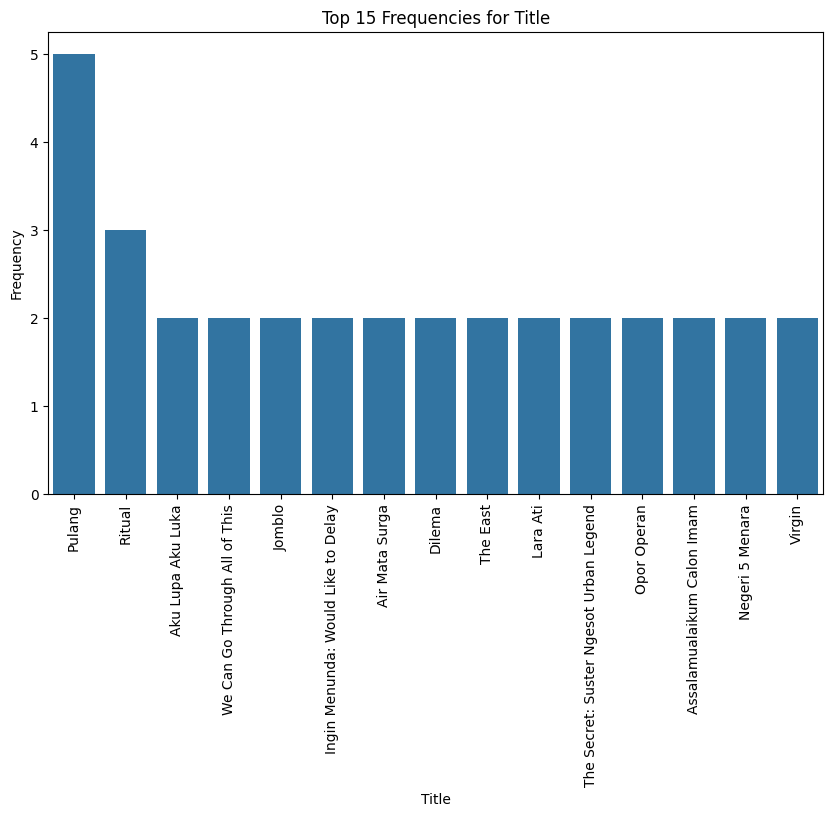

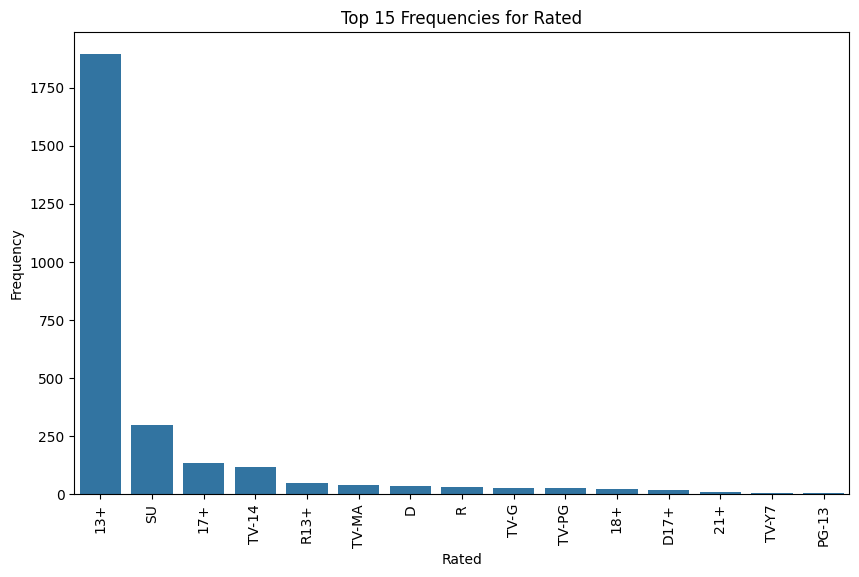

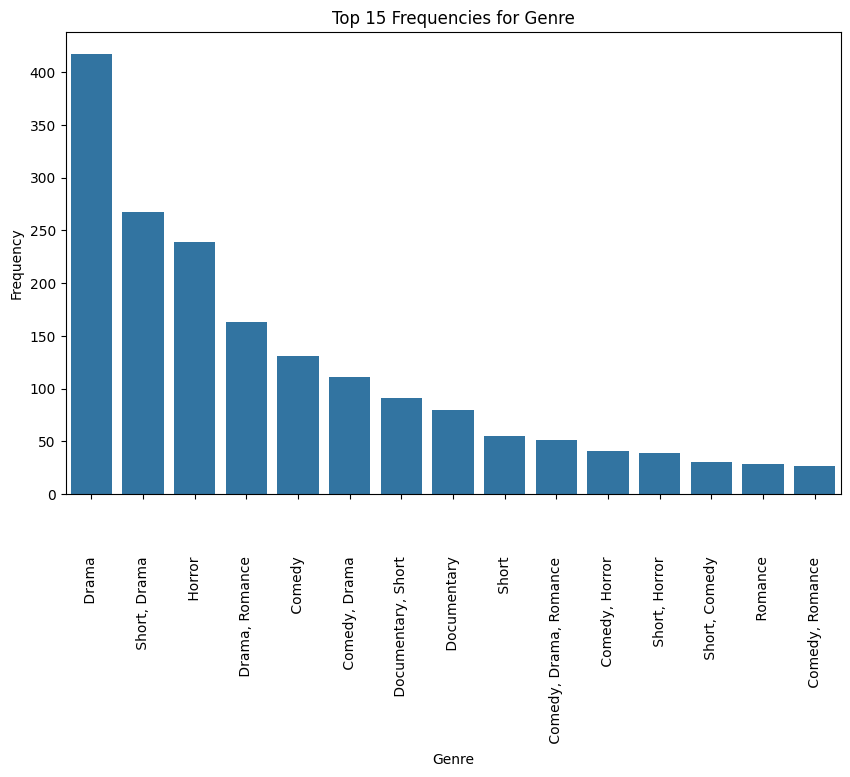

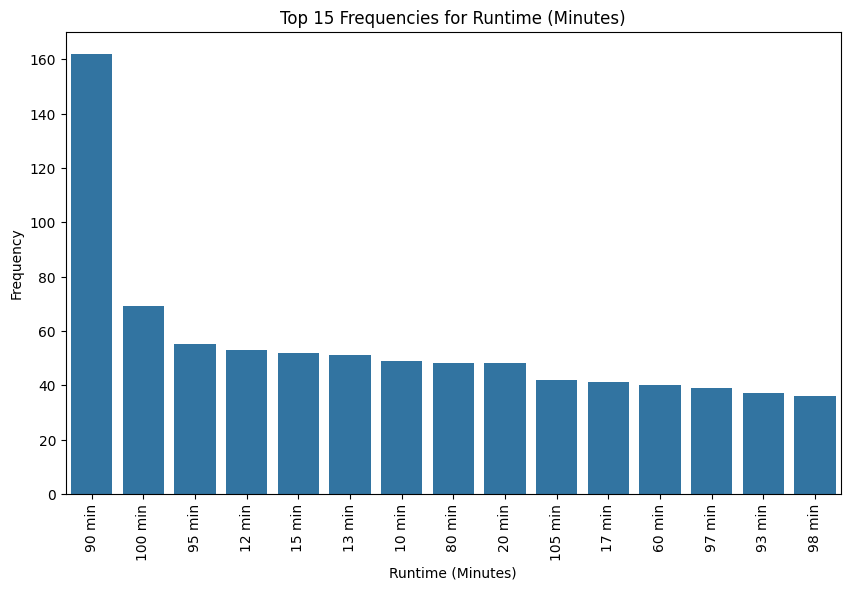

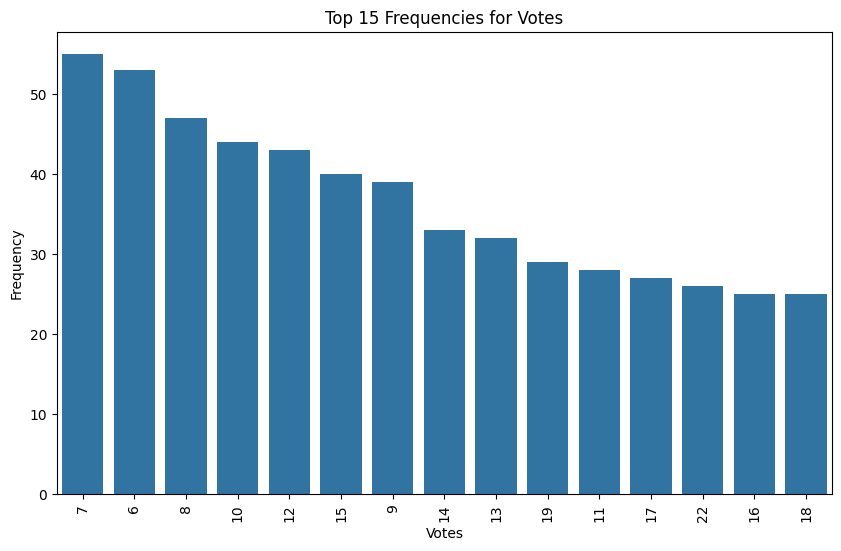

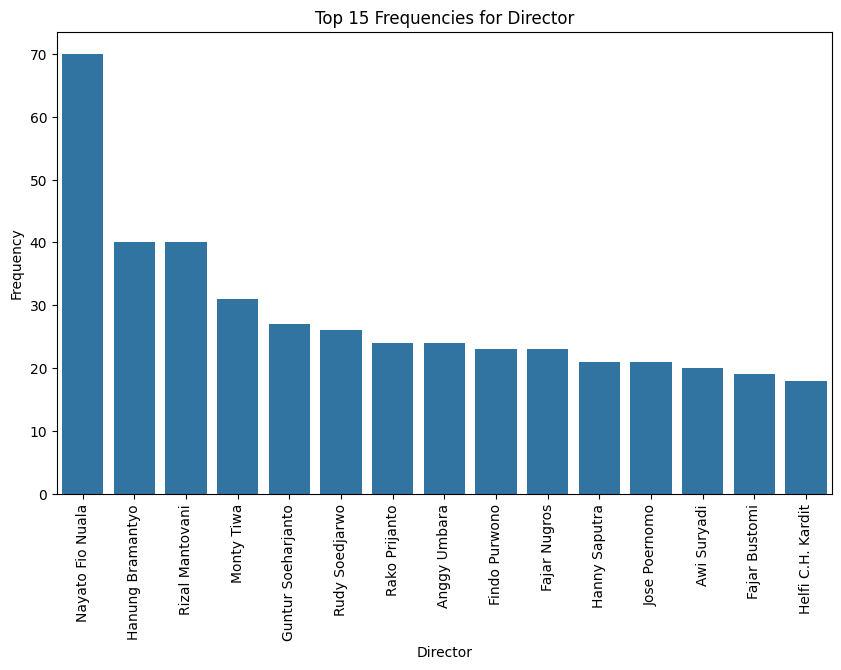

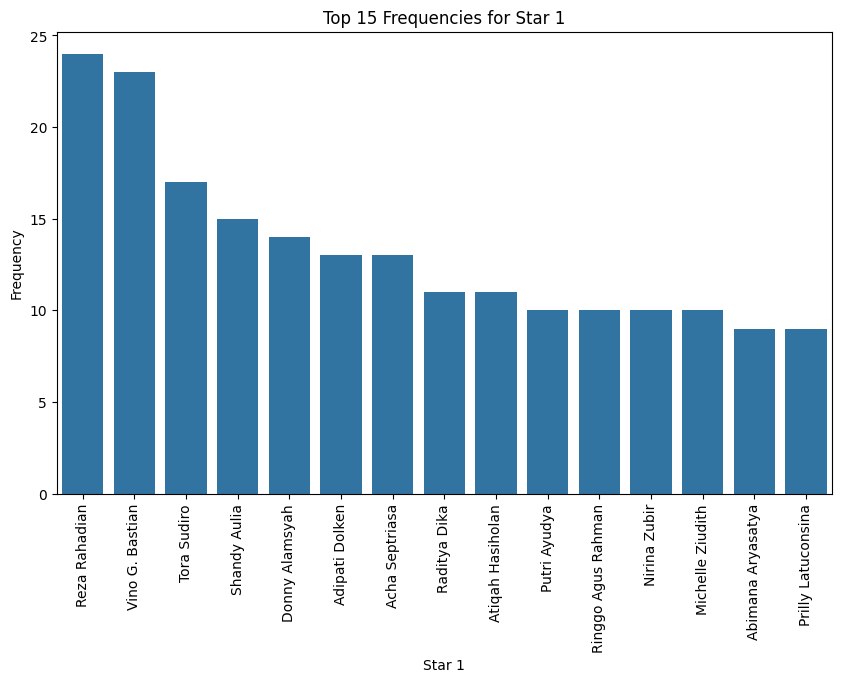

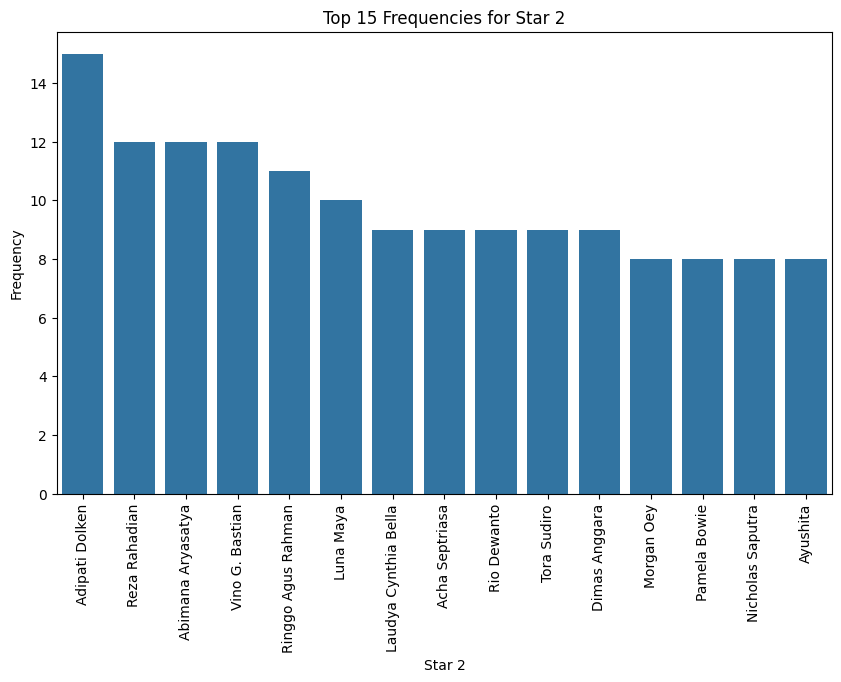

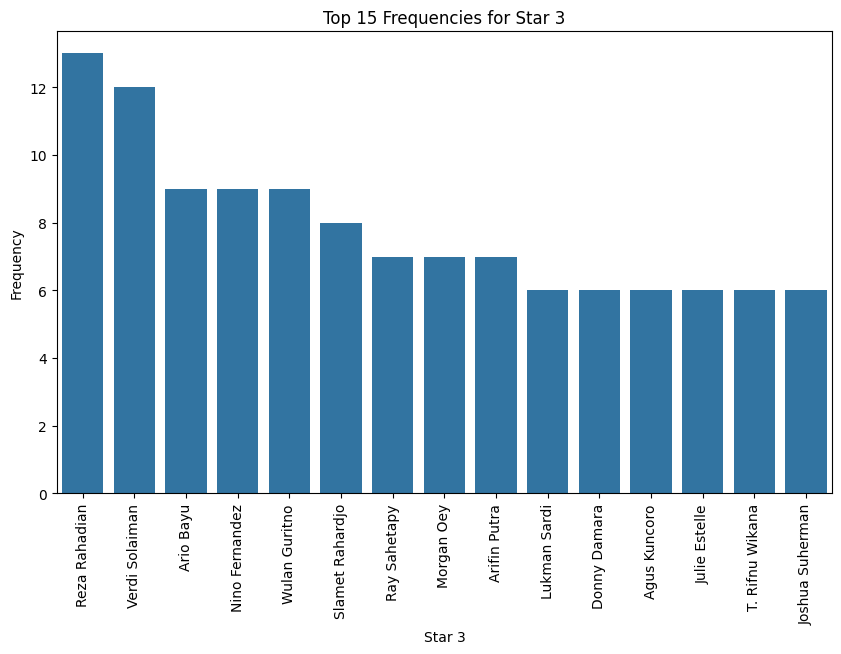

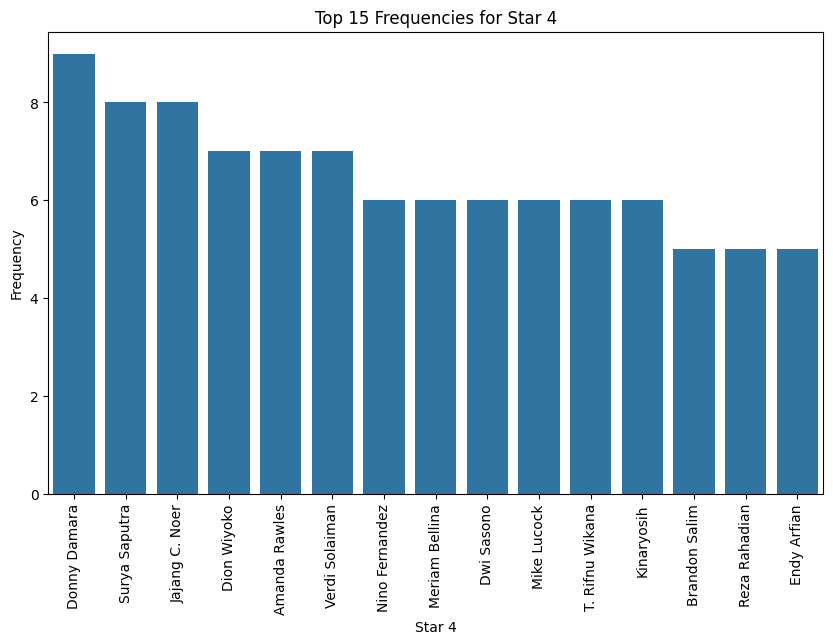

In [11]:
# Membuat visualisasi frekuensi terhadap data-data non-numerik sebelum dilakukan pra-pemrosesan data
for col in df.columns:
  if df[col].dtype == 'object':
    top_15 = df[col].value_counts().nlargest(15)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_15.index, y=top_15.values)
    plt.xticks(rotation=90)
    plt.title(f'Top 15 Frequencies for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# **Tahap Pra-Pemrosesan Data**
Kode ini digunakan untuk menghapus baris-baris yang duplikat dalam DataFrame. Fungsi ini akan memeriksa setiap baris, dan jika ada baris yang identik dengan baris lainnya, hanya satu yang akan dipertahankan. Secara default, fungsi ini menghapus baris duplikat berdasarkan seluruh kolom. Hasilnya, DataFrame yang baru akan berisi hanya baris-baris unik, tanpa duplikat.

In [12]:
# Menghapus kolom yang berisi nilai duplikat dengan baris lainnya
df = df.drop_duplicates()

Kode ini bertujuan untuk mengubah tipe data pada kolom "Runtime (Minutes)" menjadi float64. Pertama-tama dihilangkan terlebih dahulu kata "min" yang merupakan kependekan dari kata "minutes" supaya menjadi data numerik. Kemudian tipe datanya yang semula berupa objek diubah menjadi bertipe data float64.

In [13]:
# Menghapus kata "min" dalam kolom "Runtime (Minutes)" lalu mengubahnya menjadi bertipe data float64 dan menampilkan dataframe tersebut.
df['Runtime (Minutes)'] = df['Runtime (Minutes)'].astype(str).str.replace('min', '')
df['Runtime (Minutes)'] = df['Runtime (Minutes)'].astype('float64')
df

<ipython-input-13-96c21b650ae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime (Minutes)'] = df['Runtime (Minutes)'].astype(str).str.replace('min', '')
<ipython-input-13-96c21b650ae5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime (Minutes)'] = df['Runtime (Minutes)'].astype('float64')


,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
0,Kisah Tanah Jawa: Merapi,2019,18+,Horror,43.0,7.8,37,Faozan Rizal,Deva Mahenra,Joshua Suherman,Laura Basuki,Laura Theux
1,Negeri Dongeng,2017,SU,Documentary,98.0,8.9,8,Anggi Frisca,NaN,NaN,NaN,NaN
2,Workingman's Death,2005,13+,Documentary,122.0,7.9,"1,757",Michael Glawogger,NaN,NaN,NaN,NaN
3,Magic Hour,2015,18+,"Comedy, Drama",96.0,8.7,6,Asep Kusdinar,Dimas Anggara,Michelle Ziudith,Rizky Nazar,Nadya Arina
4,Jakarta Love Story,2015,13+,Romance,50.0,NaN,NaN,Vemmy Sagita,Irish Bella,Rezky Adhitya,Rionaldo Stockhorst,Mischa Chandrawinata
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Nariti: Romansa Danau Toba,2022,13+,Drama,85.0,NaN,NaN,Deden Bagaskara,Zoe Abbas Jackson,Bastian Steel,Paramitha Rusady,August Melasz
2704,Hompimpa,2021,D17+,"Horror, Thriller",87.0,6.5,12,Arie Azis,Zoe Abbas Jackson,Kenny Austin,Sebryan Yosvien,Sonia Alexa
2705,Moammar Emka's Jakarta Undercover,2017,21+,"Drama, Romance",129.0,7.1,121,Fajar Nugros,Zoya Amirin,Oka Antara,Ganindra Bimo,Edo Borne
2706,Dan Pulang,2019,13+,"Short, Drama",13.0,NaN,NaN,Daphne,Zulfa Maharani Putri,Oktavia Lisna,NaN,NaN


Kode di atas digunakan untuk mengisi baris-baris yang memiliki nilai yang kosong.

1. **Mengisi baris yang kosong pada kolom 'Runtime (Minutes)' dengan nilai rata-rata.**
Kode ini mengonversi kolom 'Runtime (Minutes)' menjadi tipe data float dan menghitung rata-rata dari nilai-nilai yang ada. Rata-rata ini digunakan untuk mengisi nilai yang kosong (NaN) di kolom tersebut. Hal ini membantu menghindari kehilangan data dan menjaga keutuhan informasi pada kolom. Setelah menghitung rata-rata, baris yang memiliki nilai kosong pada kolom 'Runtime (Minutes)' akan diisi dengan nilai rata-rata tersebut. Fungsi fillna(mean_runtime) digunakan untuk menggantikan nilai kosong dengan rata-rata yang sudah dihitung. Dengan ini, data menjadi lebih lengkap dan konsisten.

2. **Mengisi NaN di kolom 'Rating' dengan modus.**
Modus (nilai yang paling sering muncul) pada kolom 'Rating' dihitung menggunakan mode(). Jika ada lebih dari satu modus, yang pertama dipilih untuk mengisi nilai yang kosong. Penggunaan modus sangat berguna untuk data kategori seperti rating yang biasanya memiliki nilai terbanyak.

3. **Mengisi NaN di kolom 'Votes' dengan modus lalu diubah menjadi bertipe data int64.**
Sama seperti kolom 'Rating', kolom 'Votes' juga diisi dengan modusnya untuk menggantikan nilai kosong. Setelah seluruhnya terisi lalu mengubah tipe data pada kolom ini menjadi bertipe data int64.

4. **Menampilkan informasi tentang DataFrame.** Ini memberikan gambaran umum tentang status data setelah pengisian nilai kosong.

In [14]:
# Mengisi baris kosong pada kolom 'Runtime (Minutes)' dengan rata-rata
mean_runtime = df['Runtime (Minutes)'].astype(float).mean()
df['Runtime (Minutes)'] = df['Runtime (Minutes)'].fillna(mean_runtime)

# Mengisi baris kosong pada kolom 'Rating' dengan modus
rating_mode = df['Rating'].mode()[0]  # Get the first mode if multiple exist
df['Rating'] = df['Rating'].fillna(rating_mode)

# Mengisi baris kosong pada kolom 'Votes' dengan modus lalu mengubahnya menjadi bertipe data int64
votes_mode = df['Votes'].mode()[0]  # Get the first mode if multiple exist
df['Votes'] = df['Votes'].fillna(votes_mode)
df['Votes'] = df['Votes'].str.replace(',', '').astype('int64')

# Menampilkan informasi penting setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2706 entries, 0 to 2707
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2706 non-null   object 
 1   Year               2706 non-null   int64  
 2   Rated              2706 non-null   object 
 3   Genre              2706 non-null   object 
 4   Runtime (Minutes)  2706 non-null   float64
 5   Rating             2706 non-null   float64
 6   Votes              2706 non-null   int64  
 7   Director           2706 non-null   object 
 8   Star 1             2468 non-null   object 
 9   Star 2             2324 non-null   object 
 10  Star 3             2140 non-null   object 
 11  Star 4             1838 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 274.8+ KB


<ipython-input-14-7c86137f934d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime (Minutes)'] = df['Runtime (Minutes)'].fillna(mean_runtime)
<ipython-input-14-7c86137f934d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].fillna(rating_mode)
<ipython-input-14-7c86137f934d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Kode ini digunakan untuk mengelompokkan data film berdasarkan judulnya dan kemudian mengolahnya dengan kriteria tertentu untuk memilih nilai yang representatif. Pertama, data dikelompokkan berdasarkan kolom 'Title' menggunakan groupby('Title'), yang menghasilkan grup-grup film dengan judul yang sama. Selanjutnya, fungsi aggregate_data digunakan untuk mengolah setiap grup film, dengan memilih nilai tertentu seperti tahun rilis (mengambil tahun tertinggi), kategori rating (mengambil modus), genre (menggabungkan dan memilih modus), runtime, rating, jumlah suara (votes), serta aktor dan sutradara (menggunakan modus atau memilih nilai pertama jika modus tidak ada). Setelah itu, grouped.apply(aggregate_data) diterapkan untuk setiap grup, menghasilkan DataFrame yang telah diolah sesuai dengan kriteria yang ditentukan. Hasil akhirnya disimpan dalam aggregated_df, dan reset_index() digunakan untuk mengatur ulang indeks agar data lebih mudah dibaca.

In [15]:
# Mengelompokkan judul film yang frekuensi kemunculannya lebih dari sekali
grouped = df.groupby('Title')

# Kriteria tertentu yang digunakan untuk memilih atribut pada film yang memiliki jumlah kemunculan lebih dari sekali.
def aggregate_data(group):
    year = group['Year'].max()
    rated = group['Rated'].mode()[0]
    genres = ', '.join(group['Genre'].dropna().astype(str))
    genre = pd.Series(genres.split(', ')).mode()[0].strip()
    runtime = group['Runtime (Minutes)'].max()
    rating = group['Rating'].max()
    votes = group['Votes'].max()
    director = group['Director'].mode()[0] if len(group['Director'].mode()) > 0 else group['Director'].iloc[0] if len(group['Director']) > 0 else float('nan')
    star1 = group['Star 1'].mode()[0] if len(group['Star 1'].mode()) > 0 else group['Star 1'].iloc[0] if len(group['Star 1']) > 0 else float('nan')
    star2 = group['Star 2'].mode()[0] if len(group['Star 2'].mode()) > 0 else group['Star 2'].iloc[0] if len(group['Star 2']) > 0 else float('nan')
    star3 = group['Star 3'].mode()[0] if len(group['Star 3'].mode()) > 0 else group['Star 3'].iloc[0] if len(group['Star 3']) > 0 else float('nan')
    star4 = group['Star 4'].mode()[0] if len(group['Star 4'].mode()) > 0 else group['Star 4'].iloc[0] if len(group['Star 4']) > 0 else float('nan')

    return pd.Series({
        'Year': year,
        'Rated': rated,
        'Genre': genre,
        'Runtime (Minutes)': runtime,
        'Rating': rating,
        'Votes': votes,
        'Director': director,
        'Star 1': star1,
        'Star 2': star2,
        'Star 3': star3,
        'Star 4': star4,
    })

# Menyimpan hasil lalu menampilkannya
aggregated_df = grouped.apply(aggregate_data).reset_index()
aggregated_df

<ipython-input-15-9707c31b53eb>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_df = grouped.apply(aggregate_data).reset_index()


,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2,Star 3,Star 4
0,#66,2015,13+,Action,116.0,5.7,30,Asun Mawardi,Ari Riski Ananda,Erwin Bagindo,Fandy Christian,Franki Darmawan
1,#66: Action Sequences,2016,13+,Short,5.0,7.2,7,Asun Mawardi,Ryan Adrian Tedja,Asun Mawardi,Fandy Christian,Franki Darmawan
2,#FriendButMarried 2,2020,TV-14,Biography,100.0,6.8,319,Rako Prijanto,Adipati Dolken,Mawar Eva de Jongh,Vonny Cornellya,Sari Nila
3,#FriendsButMarried,2018,TV-14,Biography,102.0,6.8,728,Rako Prijanto,Adipati Dolken,Vanesha Prescilla,Refal Hady,Denira Wiraguna
4,#Malam Jumat: The Movie,2019,17+,Horror,91.0,5.4,75,Hadrah Daeng Ratu,Ewing H.D.,Zoe Abbas Jackson,Dea Annisa,Randy Pangalila
...,...,...,...,...,...,...,...,...,...,...,...,...
2676,Zeta: When the Dead Awaken,2019,17+,Action,94.0,6.6,35,Amanda Iswan,Cut Mini Theo,Jeff Smith,Dimas Aditya,Edo Borne
2677,Zharfa,2019,13+,Drama,96.0,6.6,5,Ruli Wanisar,Kaka Azraff,Donny Alamsyah,Betari Ayu,Shelomita
2678,Ziarah,2016,13+,Drama,87.0,8.3,78,B.W. Purba Negara,Ponco Sutiyem,Rukman Rosadi,Ledjar Subroto,Vera Prifatamasari
2679,ZoKer: Bullying of the Dead,2019,13+,Short,13.0,7.2,7,Eric Kairupan,Fiki Firmanto,Albarezi Candera,Marvell Kairupan,Hendra Wahyudi


Kode ini digunakan untuk menghapus kolom 'Star 3' dan 'Star 4' dari DataFrame aggregated_df menggunakan drop(['Star 3', 'Star 4'], axis=1), yang menghapus kolom berdasarkan nama kolom. Setelah itu, dropna() digunakan untuk menghapus baris-baris yang memiliki nilai kosong (NaN) di seluruh kolom. Akhirnya, df.info() dipanggil untuk menampilkan informasi mengenai struktur DataFrame yang telah dibersihkan, termasuk jumlah baris dan kolom yang tersisa setelah penghapusan kolom dan baris dengan nilai kosong.

In [16]:
# Menghapus kolom 'Star 3' and 'Star 4' dan baris yang memiliki nilai kosong
df = aggregated_df.drop(['Star 3', 'Star 4'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 0 to 2680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2305 non-null   object 
 1   Year               2305 non-null   int64  
 2   Rated              2305 non-null   object 
 3   Genre              2305 non-null   object 
 4   Runtime (Minutes)  2305 non-null   float64
 5   Rating             2305 non-null   float64
 6   Votes              2305 non-null   int64  
 7   Director           2305 non-null   object 
 8   Star 1             2305 non-null   object 
 9   Star 2             2305 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 198.1+ KB


# **Tahap Visualisasi Data**
Kode ini digunakan untuk membuat visualisasi frekuensi terhadap kolom non-numerik (kolom bertipe 'object') dalam DataFrame setelah dilakukan tahap pra-pemrosesan data.

- Looping kolom: Kode ini melakukan iterasi untuk setiap kolom di DataFrame dan memeriksa apakah kolom tersebut bertipe 'object' (biasanya untuk data kategorikal).
- Menghitung frekuensi: Untuk kolom bertipe 'object', value_counts().nlargest(15) menghitung frekuensi kemunculan nilai dan memilih 15 nilai teratas.
- Membuat visualisasi: Menggunakan sns.barplot, kode ini menggambar grafik batang frekuensi nilai-nilai teratas, dengan rotasi label pada sumbu x sebesar 90 derajat.
- Menampilkan grafik: Setiap grafik diberi judul, label sumbu x dan y, dan kemudian ditampilkan menggunakan plt.show().

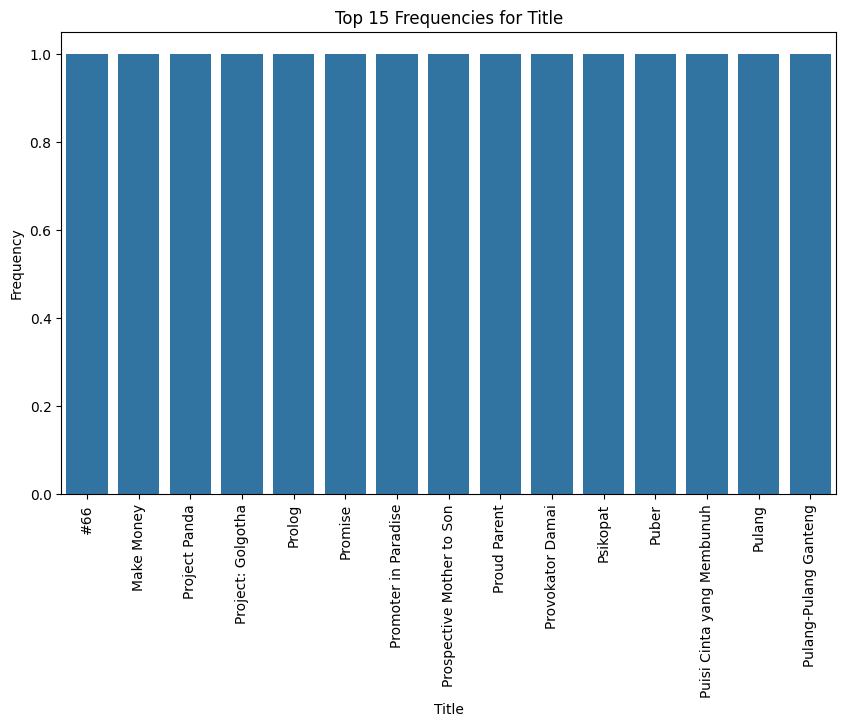

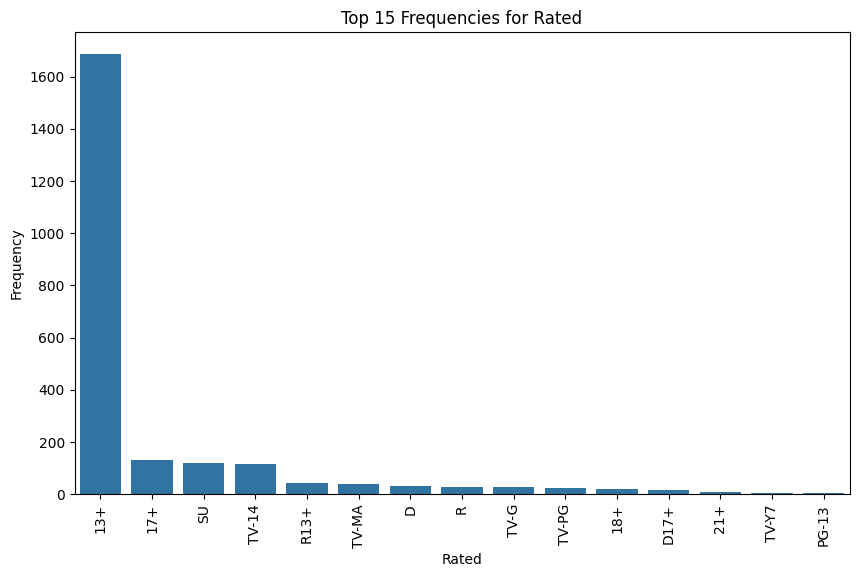

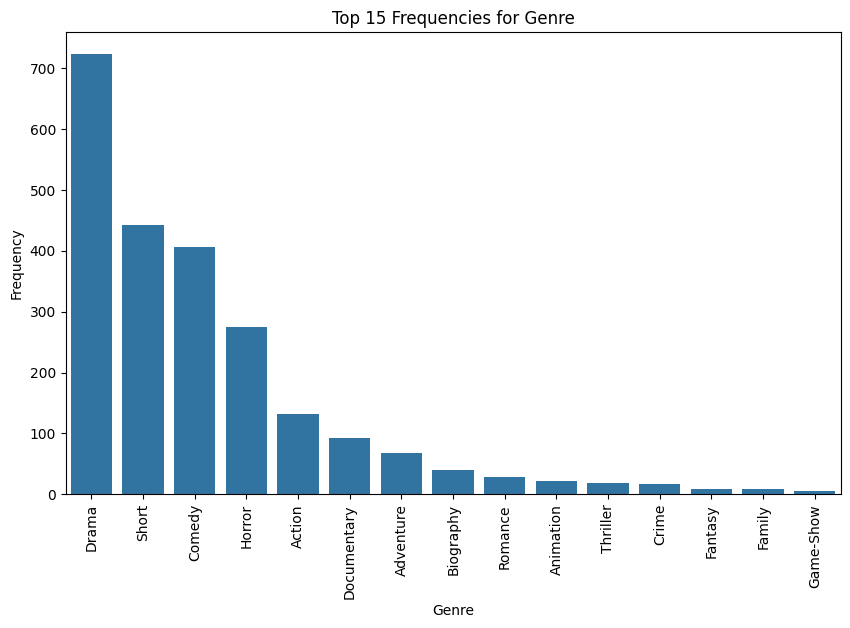

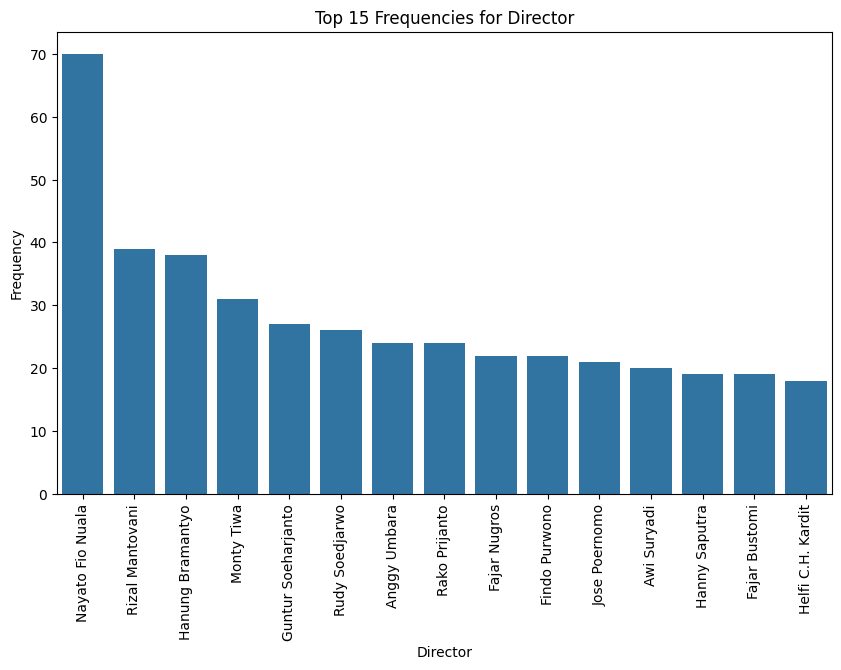

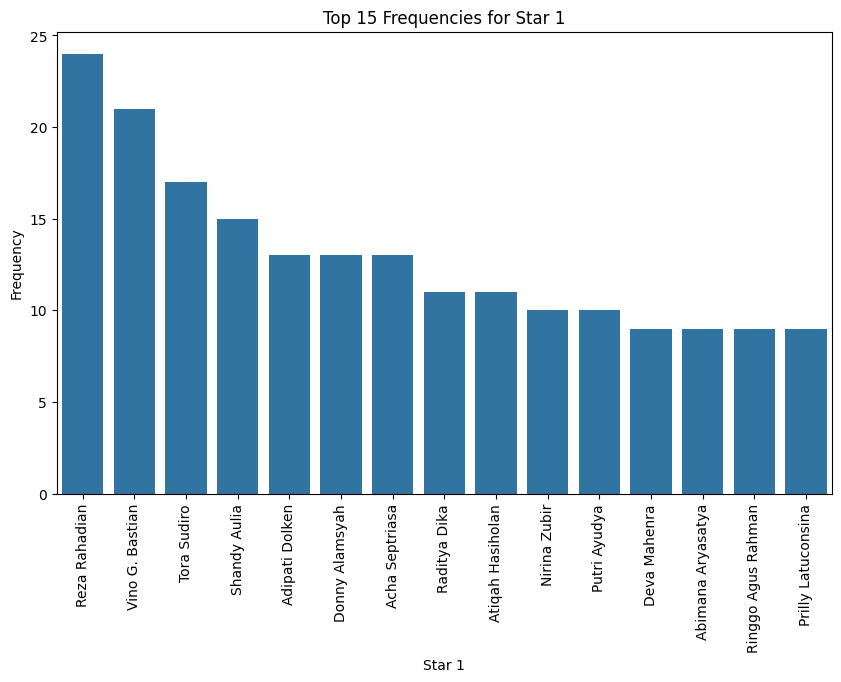

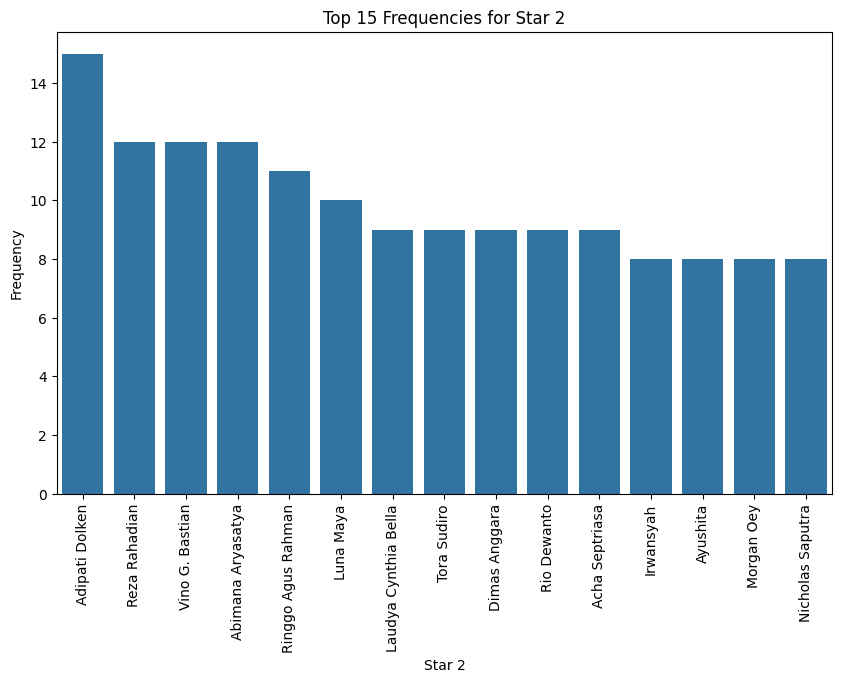

In [17]:
# Membuat visualisasi frekuensi terhadap data-data non-numerik setelah tahap pra-pemrosesan data
for col in df.columns:
  if df[col].dtype == 'object':
    top_15 = df[col].value_counts().nlargest(15)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_15.index, y=top_15.values)
    plt.xticks(rotation=90)
    plt.title(f'Top 15 Frequencies for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# **Pembuatan Model Content Based Filtering**

Kode ini digunakan untuk menerapkan teknik TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah teks menjadi representasi numerik yang dapat digunakan dalam analisis data.

- Inisialisasi TfidfVectorizer: TfidfVectorizer() digunakan untuk mengubah teks menjadi vektor fitur berdasarkan frekuensi kata dan relevansinya dalam dokumen.
- Mempersiapkan data untuk TF-IDF: Kolom-kolom yang relevan seperti 'Year', 'Rated', 'Genre', dll. dipilih dan digabungkan menjadi satu kolom teks yang disebut 'combined_text'. Semua nilai diubah menjadi tipe data string dan digabungkan menggunakan spasi.
- Menghitung IDF: Fungsi fit() pada tf menghitung nilai IDF (Inverse Document Frequency) berdasarkan kolom 'combined_text'.
- Mendapatkan nama fitur: get_feature_names_out() digunakan untuk mendapatkan nama fitur yang mewakili kata-kata atau istilah yang ada dalam model TF-IDF, yang diurutkan berdasarkan indeks integer.

In [18]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Memilih kolom kombinasi untuk TF-IDF lalu mengubahnya menjadi tipe data string dan mengumpulkan dalam satu kolom
columns_for_tfidf = ['Year', 'Rated', 'Genre', 'Rating', 'Runtime (Minutes)', 'Rating', 'Votes', 'Director', 'Star 1', 'Star 2']
df_tfidf = df[columns_for_tfidf]
df_tfidf = df_tfidf.astype(str)
df_tfidf['combined_text'] = df_tfidf.apply(' '.join, axis=1)

# Melakukan perhitungan idf pada data
tf.fit(df_tfidf['combined_text'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['10', '100', '1002', ..., 'zumi', 'zuzanna', 'zylgwyn'],
      dtype=object)

Kode ini digunakan untuk mengubah data teks menjadi representasi matriks menggunakan teknik TF-IDF.

- Fit dan transformasi: tf.fit_transform(df_tfidf['combined_text']) menghitung nilai TF-IDF untuk setiap kata dalam kolom 'combined_text' dan mengubahnya menjadi matriks numerik (TF-IDF matrix).
- Ukuran matriks: tfidf_matrix.shape digunakan untuk menampilkan ukuran matriks yang dihasilkan, yang menunjukkan jumlah baris (dokumen) dan kolom (fitur kata).

In [19]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_tfidf['combined_text'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(2305, 5051)

Kode ini digunakan untuk mengubah matriks sparse hasil dari TF-IDF menjadi matriks padat (dense matrix).

Fungsi todense() mengubah format matriks sparse (di mana banyak elemen bernilai nol) menjadi matriks penuh yang lebih mudah dibaca dan diproses, dengan semua nilai ditampilkan, termasuk nol. Hal ini memudahkan dalam visualisasi atau analisis data lebih lanjut, meskipun dapat mengonsumsi lebih banyak memori jika matriksnya besar.

In [20]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.2197646, 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

Kode ini digunakan untuk mengonversi matriks TF-IDF menjadi DataFrame dan menampilkan sampel data.

- Membuat DataFrame: pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names_out(), index=df.Title) mengubah matriks TF-IDF menjadi DataFrame, dengan kolom-kolom yang mewakili kata-kata (fitur) dan indeks yang mewakili judul film dari kolom 'Title'.
- Sampling kolom dan baris: .sample(22, axis=1) memilih 22 kolom secara acak, sementara .sample(10, axis=0) memilih 10 baris secara acak dari DataFrame yang dihasilkan. Ini digunakan untuk melihat subset data yang lebih kecil dari matriks TF-IDF.

In [21]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df.Title
).sample(22, axis=1).sample(10, axis=0)

,marvell,azhar,raisya,hestu,heidy,pakpahan,miranda,mccarthy,basto,ineke,...,hapsah,adaila,patritz,puteri,bewava,khozy,ziva,dzulfiqar,revalina,ardiansyah
Title,,,,,,,,,,,,,,,,,,,,,
On Mother's Head,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
"Ora Srawung, Mati Suwung",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
Question Mark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3685,0.0
Amak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
Merdeka atau Mati!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
Silariang the Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
A Chocolate Bar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
Ready Bro!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


Kode ini digunakan untuk menghitung cosine similarity antara setiap pasangan dokumen dalam matriks TF-IDF.

- Cosine similarity: cosine_similarity(tfidf_matrix) menghitung kemiripan sudut antara vektor-vektor TF-IDF dari setiap dokumen dalam matriks. Nilai similarity berada dalam rentang 0 hingga 1, di mana 1 menunjukkan dokumen yang identik dan 0 menunjukkan dokumen yang sangat berbeda.
- Matriks hasil: Hasilnya adalah matriks berbentuk persegi yang menunjukkan nilai cosine similarity antara setiap pasangan dokumen dalam dataset.

In [22]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.40240248, 0.        , ..., 0.00397009, 0.00855598,
        0.00836036],
       [0.40240248, 1.        , 0.        , ..., 0.03442569, 0.02325976,
        0.02272796],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03459832],
       ...,
       [0.00397009, 0.03442569, 0.        , ..., 1.        , 0.00840906,
        0.0082168 ],
       [0.00855598, 0.02325976, 0.        , ..., 0.00840906, 1.        ,
        0.03594751],
       [0.00836036, 0.02272796, 0.03459832, ..., 0.0082168 , 0.03594751,
        1.        ]])

Kode ini digunakan untuk membuat DataFrame yang memvisualisasikan matriks cosine similarity antara film-film berdasarkan fitur TF-IDF.

- Membuat DataFrame: pd.DataFrame(cosine_sim, index=df['Title'], columns=df['Title']) mengonversi matriks cosine similarity menjadi DataFrame, dengan baris dan kolom berupa judul film dari kolom 'Title', sehingga setiap sel menunjukkan tingkat kemiripan antara dua film.
- Melihat ukuran: print('Shape:', cosine_sim_df.shape) menampilkan ukuran DataFrame untuk mengetahui jumlah baris dan kolom yang ada.
- Sampling matrix: cosine_sim_df.sample(10, axis=1).sample(10, axis=0) mengambil sampel acak 10 kolom dan 10 baris dari matriks untuk melihat sebagian kecil dari matriks similarity.

In [23]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Title'], columns=df['Title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap atribut
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (2305, 2305)


Title,Alles Goed: From Gunung Kidul to Europe,"Tonight, We're Going to Dance All Night Long",Duka Sedalam Cinta,Susahnya Jadi Perawan,Suami Untuk Mak,DreadOut,Perjaka Terakhir 2,Di antara masa lalu dan masa sekarang,Before Fireworks,Habibie & Ainun 3
Title,,,,,,,,,,
Serigala Terakhir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Women's Honai for Peace,0.018718,0.002281,0.002764,0.002674,0.002953,0.000000,0.003213,0.002517,0.002521,0.000000
KNK: Santa Claus Dari Jakarta?,0.003528,0.003556,0.004310,0.022464,0.024810,0.000000,0.026994,0.003926,0.031272,0.000000
Black Magic,0.003517,0.018152,0.004297,0.004157,0.004591,0.000000,0.004995,0.020037,0.020064,0.035445
Afternoon: Wife from the Future,0.000000,0.000000,0.049406,0.047432,0.039811,0.000000,0.000000,0.044654,0.000000,0.000000
The Mother's Prayer (Doa Sang Ibu),0.087330,0.061742,0.010416,0.010077,0.011129,0.000000,0.012109,0.029029,0.029067,0.000000
Love is a Story,0.003873,0.003904,0.084112,0.004578,0.005056,0.000000,0.005501,0.004310,0.034334,0.000000
"Dad, Why Am I Different?",0.000000,0.000000,0.012971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033028
Dear Nathan: Thank You Salma,0.003984,0.004015,0.018194,0.004708,0.005200,0.213354,0.089789,0.004432,0.004438,0.217350


Fungsi film_recommendations ini digunakan untuk memberikan rekomendasi film berdasarkan cosine similarity terhadap sebuah film yang diberikan.

- Mendapatkan indeks similarity: Fungsi dimulai dengan mencari indeks film yang paling mirip dengan film yang dicari (dengan judul Title) dalam matriks similarity (similarity_data). argpartition digunakan untuk mengurutkan dan memilih k film teratas yang paling mirip.
- Mengambil film dengan similarity terbesar: Indeks yang dihasilkan digunakan untuk mengambil film yang memiliki nilai similarity terbesar dengan film yang dicari, dan nama film tersebut disimpan dalam variabel closest.
- Menyaring hasil: Film yang dicari (Title) dihapus dari daftar rekomendasi menggunakan drop, agar tidak muncul dalam daftar hasil rekomendasi.
- Mengembalikan rekomendasi: Fungsi kemudian menggabungkan data film terkait (dari items) dengan hasil closest, dan menampilkan k rekomendasi teratas dalam bentuk DataFrame.

In [24]:
def film_recommendations(Title, similarity_data=cosine_sim_df, items=df[['Title', 'Year', 'Rated', 'Genre', 'Rating', 'Runtime (Minutes)', 'Rating', 'Votes', 'Director', 'Star 1', 'Star 2']], k=10):
  index = similarity_data.loc[:,Title].to_numpy().argpartition(
  range(-1, -k, -1))
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(Title, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

# **Tahap Evaluasi Model**
Kode tersebut digunakan untuk memfilter baris dalam DataFrame df yang memiliki judul film yang dimaksud pada kolom 'Title'. Fungsi eq() memeriksa apakah nilai di kolom 'Title' sama dengan judul film yang dimaksud. Ini menghasilkan serangkaian nilai boolean (True atau False). Kemudian, filter ini diterapkan pada DataFrame, sehingga hanya baris dengan nilai True (yaitu yang memiliki judul film yang dimaksud) yang ditampilkan.

In [25]:
df[df.Title.eq('Ziarah')]

,Title,Year,Rated,Genre,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2
2678,Ziarah,2016,13+,Drama,87.0,8.3,78,B.W. Purba Negara,Ponco Sutiyem,Rukman Rosadi


Kode ini digunakan untuk mendapatkan rekomendasi film yang mirip dengan film yang dimaksud berdasarkan cosine similarity.
Fungsi film_recommendations akan mencari film dengan kemiripan tertinggi terhadap judul film yang dimaksud menggunakan matriks cosine similarity yang telah dihitung sebelumnya.Fungsi ini akan mengembalikan daftar k film yang paling mirip, lengkap dengan informasi terkait seperti tahun, rating, genre, dan lainnya.

In [26]:
# Mendapatkan rekomendasi film yang mirip dengan film "ziarah"
film_recommendations('Ziarah')

,Title,Year,Rated,Genre,Rating,Runtime (Minutes),Rating,Votes,Director,Star 1,Star 2
0,Romantik Problematik,2022,17+,Drama,7.2,86.0,7.2,7,B.W. Purba Negara,Bisma Karisma,Lania Fira
1,Starting from A,2011,SU,Short,8.6,16.0,8.6,22,B.W. Purba Negara,Bagus Suitrawan,Natasya Putri Sastrosoemarto
2,Doremi & You,2019,TV-G,Drama,7.7,99.0,7.7,62,B.W. Purba Negara,Adyla Rafa Naura Ayu,Devano Danendra
3,3600 Detik,2014,13+,Drama,6.7,90.0,6.7,46,Nayato Fio Nuala,Indra Birowo,Ponco Buwono
4,Hantu Cantik Kok Ngompol,2016,13+,Horror,7.2,78.0,7.2,7,Emil G. Hampp,Sarah Azhari,Nana Mirdad
5,Kita punya bendera,2008,SU,Family,7.2,86.0,7.2,7,Steven Purba,Bima Anggara,Nurul Hidayati
6,The Wedding Gift,2013,13+,Short,7.2,11.0,7.2,7,Jason Iskandar,Wijil Sinang Purba,Anggita Swestiana
7,Pantja Sila: Cita-Cita & Realita,2016,SU,Documentary,9.0,78.0,9.0,7,Tyo Pakusadewo,Tino Saroengallo,Wicaksono Wisnu Legowo
8,Banyu Biru,2005,13+,Drama,6.6,78.0,6.6,136,Teddy Soeriaatmadja,Tora Sudiro,Dian Sastrowardoyo
9,Belkibolang,2011,13+,Drama,5.9,87.0,5.9,25,Edwin,Ifa Isfansyah,Azhar Kinoi Lubis
